Assignment3:- perform data visualization .


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's saved as 'gas_prices.csv')
df = pd.read_csv(r"C:\Users\admin\Downloads\gas_prices.csv")


In [2]:
df.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


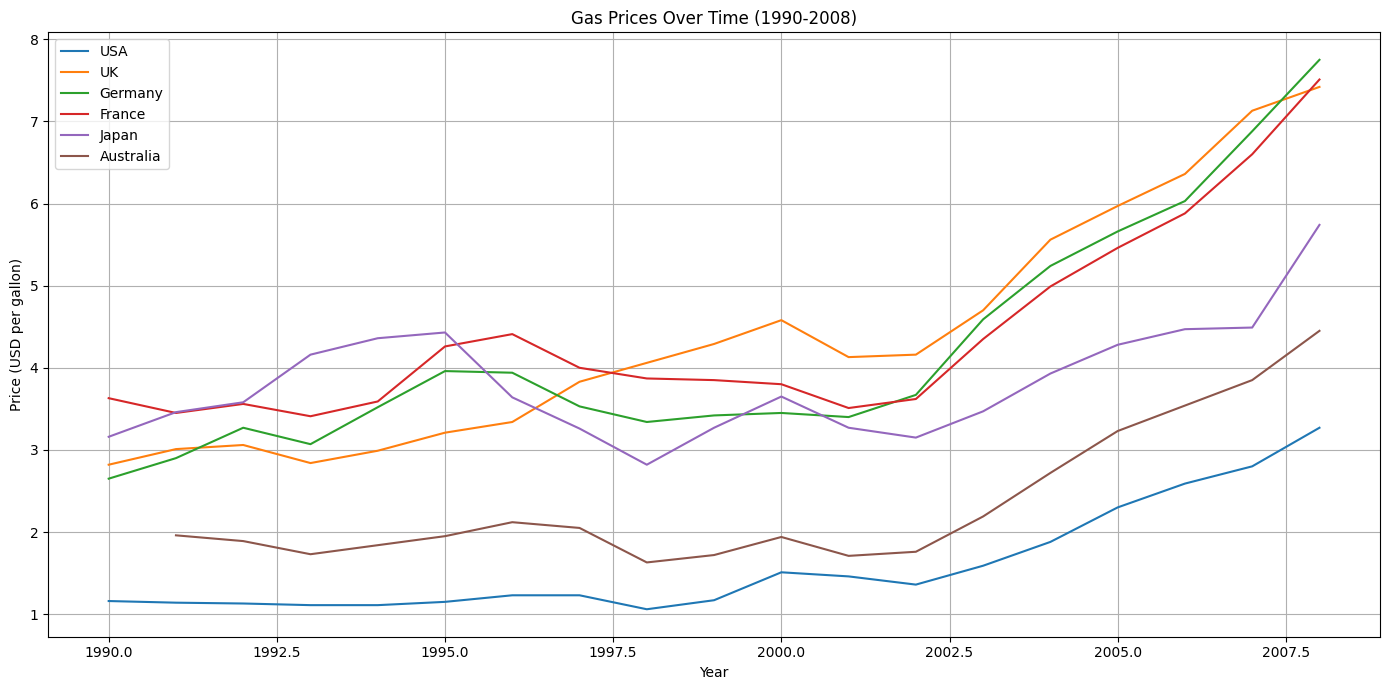

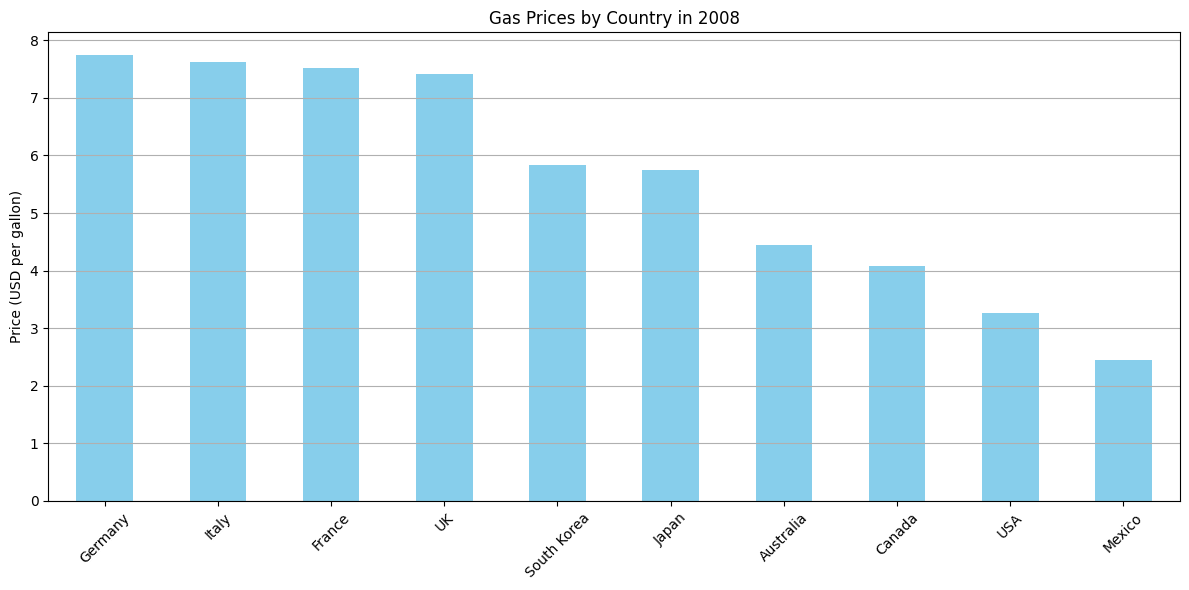

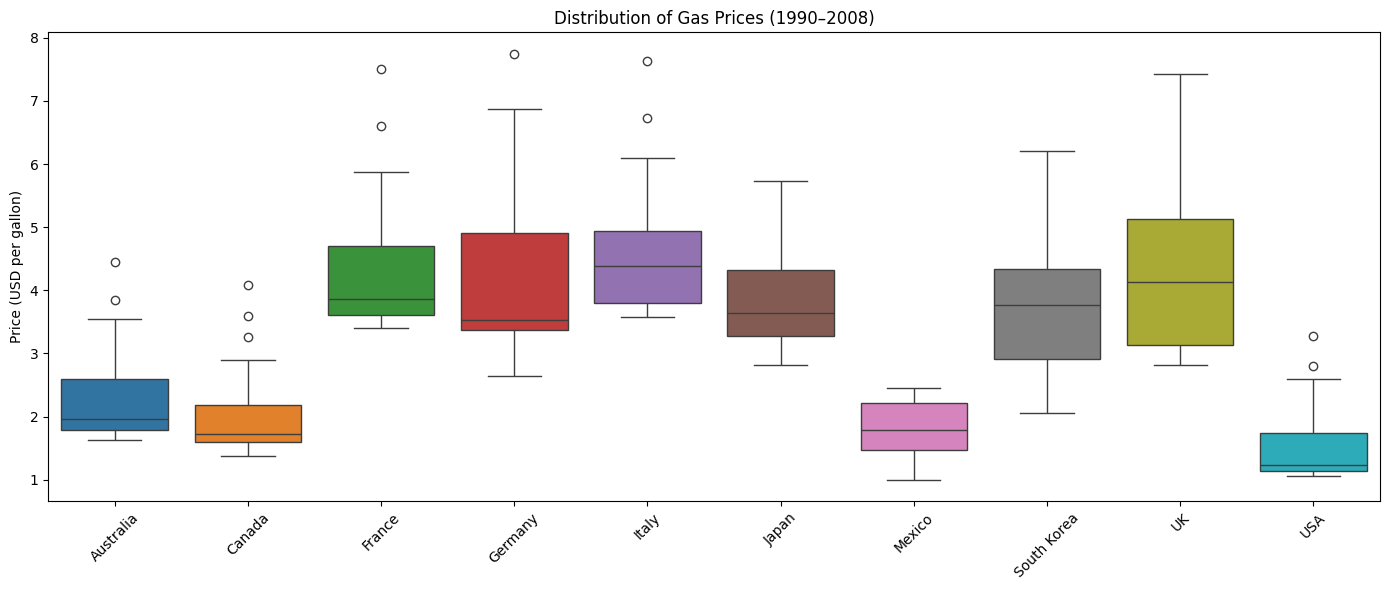

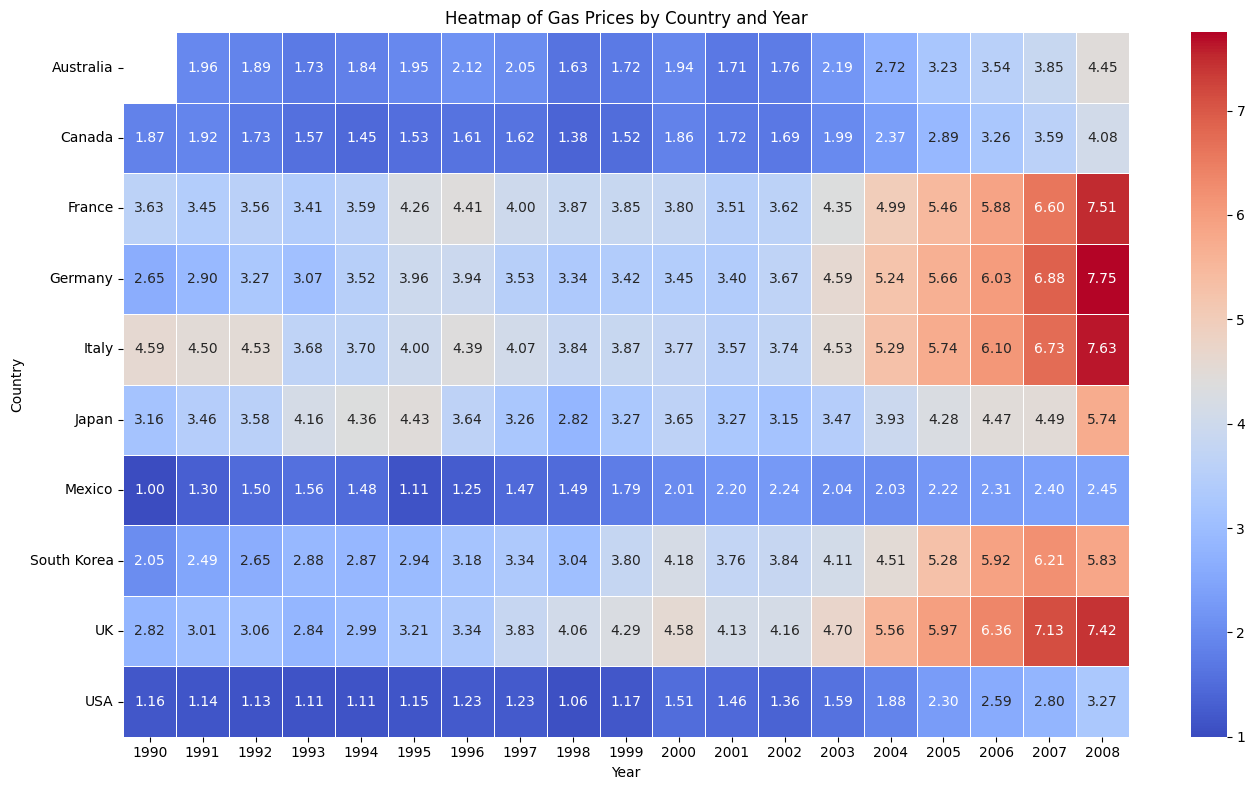

In [6]:

# Set the Year as the index
df.set_index('Year', inplace=True)

# 1. Line Plot
plt.figure(figsize=(14, 7))
for country in ['USA', 'UK', 'Germany', 'France', 'Japan', 'Australia']:
    plt.plot(df.index, df[country], label=country)
plt.title('Gas Prices Over Time (1990-2008)')
plt.xlabel('Year')
plt.ylabel('Price (USD per gallon)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Bar Plot for 2008
plt.figure(figsize=(12, 6))
df.loc[2008].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Gas Prices by Country in 2008')
plt.ylabel('Price (USD per gallon)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 3. Box Plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df)
plt.title('Distribution of Gas Prices (1990–2008)')
plt.ylabel('Price (USD per gallon)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df.transpose(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Gas Prices by Country and Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


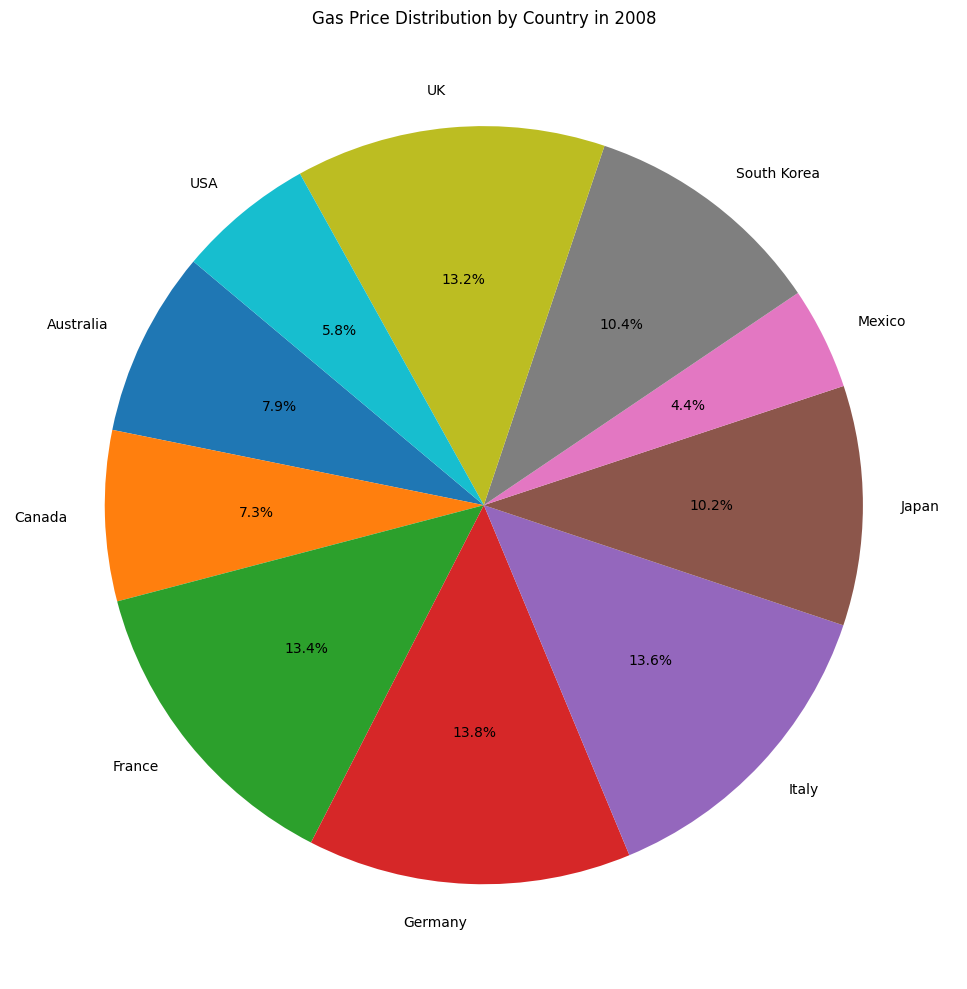

In [14]:
# import pandas as pd
# import matplotlib.pyplot as plt

# Load the data
# df = pd.read_csv(r"C:\Users\admin\Downloads\gas_prices.csv")

# Pie Chart for 2008
data_2008 = df[df['Year'] == 2008].iloc[0, 1:]  # exclude 'Year' column

plt.figure(figsize=(10, 10))
plt.pie(data_2008, labels=data_2008.index, autopct='%1.1f%%', startangle=140)
plt.title('Gas Price Distribution by Country in 2008')
plt.tight_layout()
plt.show()



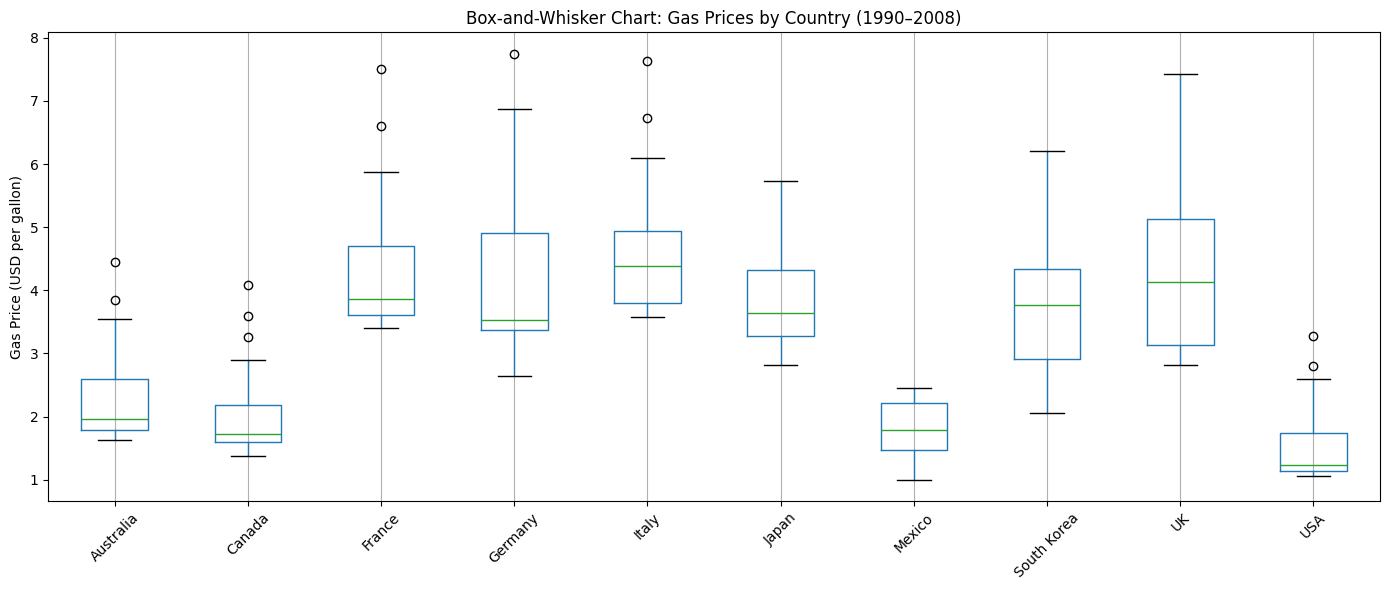

In [ ]:
# Whisker chart. This shows distribution and outliers in gas prices across all years for each country.

plt.figure(figsize=(14, 6))
df_box = df.drop(columns=['Year'])  # remove Year for boxplot
df_box.boxplot()
plt.title('Box-and-Whisker Chart: Gas Prices by Country (1990–2008)')
plt.ylabel('Gas Price (USD per gallon)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


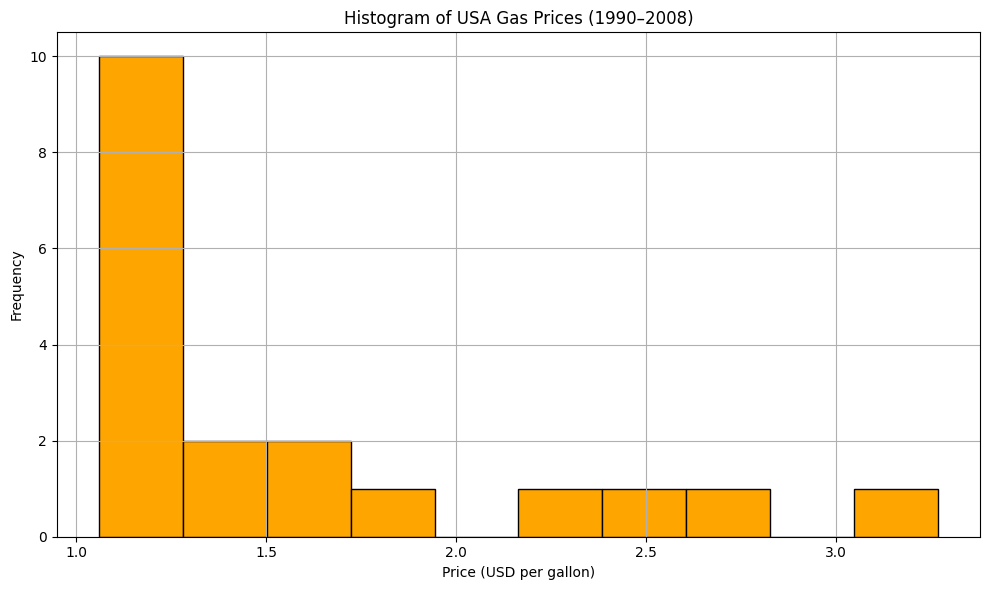

In [ ]:
# Histogram 
# Histogram of USA gas prices to observe the distribution over the years.

plt.figure(figsize=(10, 6))
plt.hist(df['USA'], bins=10, color='orange', edgecolor='black')
plt.title('Histogram of USA Gas Prices (1990–2008)')
plt.xlabel('Price (USD per gallon)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
